# Análise de dados do campeonato brasileiro de futebol, entre 2003 e 2021

In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
import seaborn as sns
import datetime as dt

In [2]:
# Adicionando caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from modulo01 import *
from modulo02 import *
from modulo03 import *

In [3]:
df = pd.read_csv("campeonato-brasileiro-full.csv", sep = ',')
df.head(50)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,heriberto hulse,2,0,SC,RJ,SC
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,alfredo jaconi,2,2,RS,SP,-
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,castelao,0,0,CE,BA,-
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,mineirao,2,2,MG,SP,-
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,barradao,1,1,BA,SC,-


In [4]:
#Verificando tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

In [5]:
#Convertendo para datetime coluna data, que está no formato string
convert_to_datetime(df, ['data'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  7645 non-null   int64         
 1   rodada              7645 non-null   int64         
 2   data                7645 non-null   datetime64[ns]
 3   hora                7645 non-null   object        
 4   dia                 7645 non-null   object        
 5   mandante            7645 non-null   object        
 6   visitante           7645 non-null   object        
 7   formacao_mandante   2671 non-null   object        
 8   formacao_visitante  2671 non-null   object        
 9   tecnico_mandante    3035 non-null   object        
 10  tecnico_visitante   3035 non-null   object        
 11  vencedor            7645 non-null   object        
 12  arena               7645 non-null   object        
 13  mandante_placar     7645 non-null   int64       

In [7]:
df.head(10)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,heriberto hulse,2,0,SC,RJ,SC
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,alfredo jaconi,2,2,RS,SP,-
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,castelao,0,0,CE,BA,-
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,mineirao,2,2,MG,SP,-
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,barradao,1,1,BA,SC,-


In [8]:
#Criando nova coluna com o total de gols por partida, para eventuais calculos para analise posteriormente
df['total_gols'] = df['mandante_placar'] + df['visitante_placar']
df.head(10)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,total_gols
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP,6
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR,2
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-,2
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-,4
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-,2
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,heriberto hulse,2,0,SC,RJ,SC,2
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,alfredo jaconi,2,2,RS,SP,-,4
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,castelao,0,0,CE,BA,-,0
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,mineirao,2,2,MG,SP,-,4
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,barradao,1,1,BA,SC,-,2


In [9]:
df['ano'] = df['data'].dt.year
df.head(10)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,total_gols,ano
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP,6,2003
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR,2,2003
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-,2,2003
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-,4,2003
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-,2,2003
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,heriberto hulse,2,0,SC,RJ,SC,2,2003
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,alfredo jaconi,2,2,RS,SP,-,4,2003
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,castelao,0,0,CE,BA,-,0,2003
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,mineirao,2,2,MG,SP,-,4,2003
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,barradao,1,1,BA,SC,-,2,2003


In [10]:
#Criando um dataframe para media de gols por ano
media_gols = df.groupby('ano')['total_gols'].mean().reset_index()
media_gols

,ano,total_gols
0,2003,2.884058
1,2004,2.778986
2,2005,3.140693
3,2006,2.710526
4,2007,2.755263
5,2008,2.723684
6,2009,2.878947
7,2010,2.573684
8,2011,2.676316
9,2012,2.473684


In [11]:
media_gols.shape

(19, 2)

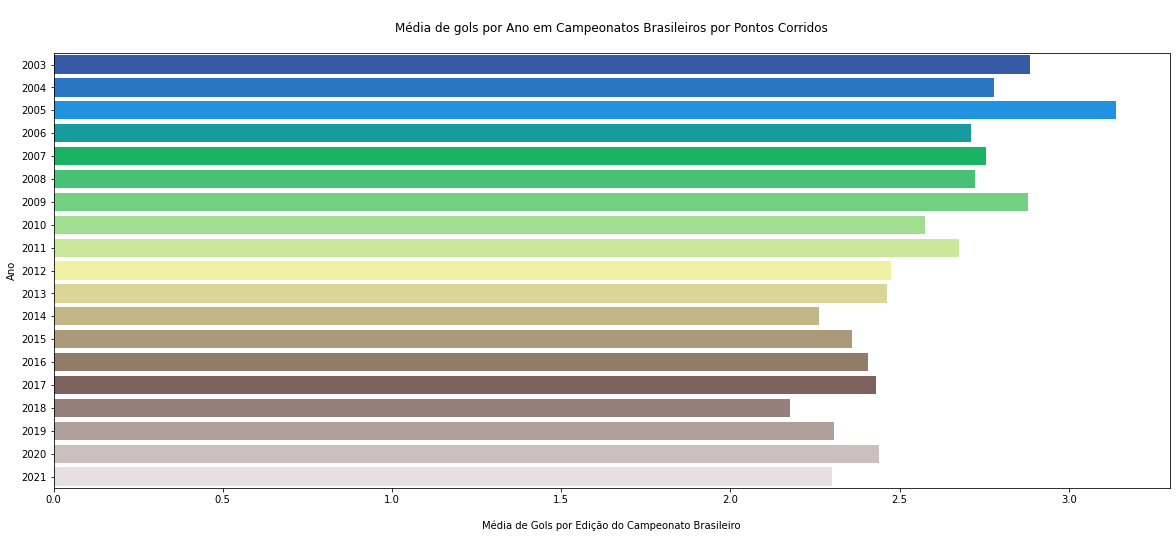

In [12]:
#Media de gols por edição do Campeonato Brasileiro
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = media_gols['ano'], x = media_gols['total_gols'], orient = "h", palette = "terrain")

plt.ylabel('Ano')             
plt.xlabel('\nMédia de Gols por Edição do Campeonato Brasileiro\n')
plt.title('\nMédia de gols por Ano em Campeonatos Brasileiros por Pontos Corridos\n')
plt.show()

In [13]:
#Top 10 clubes com maior número de vitórias de 2003 a 2021. O caracter - é usado em casos de empate. Será removido
maiores_vencedores = df['vencedor'].value_counts().reset_index().head(11)
maiores_vencedores

,index,vencedor
0,-,2015
1,Sao Paulo,338
2,Flamengo,317
3,Santos,317
4,Internacional,304
5,Corinthians,296
6,Gremio,295
7,Cruzeiro,293
8,Atletico-MG,293
9,Palmeiras,286


In [14]:
maiores_vencedores.drop([0], axis=0, inplace=True)
maiores_vencedores

,index,vencedor
1,Sao Paulo,338
2,Flamengo,317
3,Santos,317
4,Internacional,304
5,Corinthians,296
6,Gremio,295
7,Cruzeiro,293
8,Atletico-MG,293
9,Palmeiras,286
10,Fluminense,285


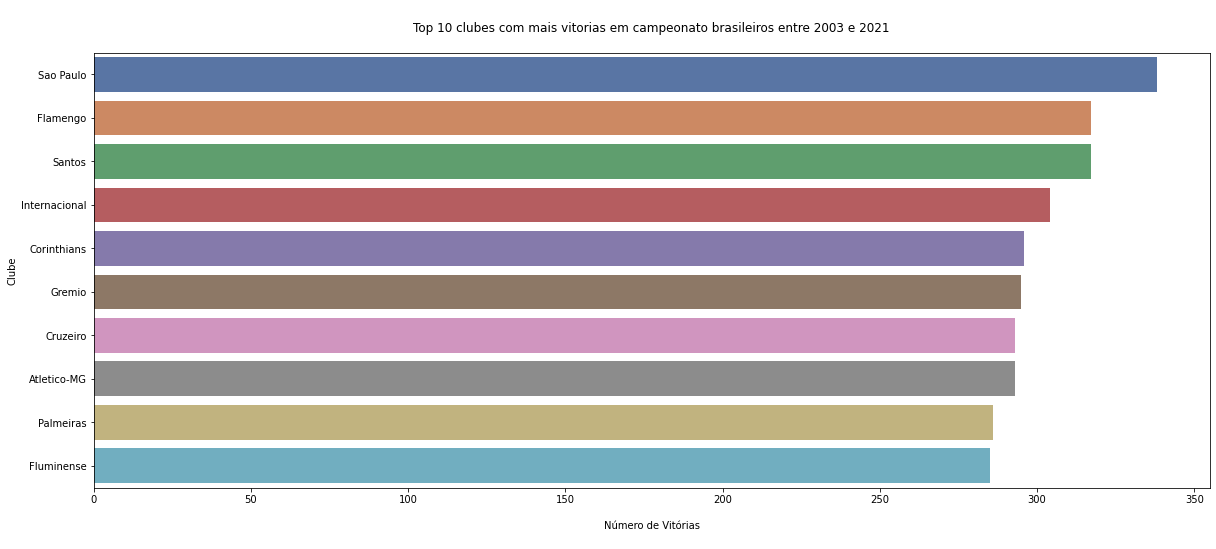

In [15]:
#Top 10 clubes com mais vitorias em campeonato brasileiros entre 2003 e 2021
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = maiores_vencedores['index'], x = maiores_vencedores['vencedor'], orient = "h", palette = "deep")

plt.ylabel('Clube')             
plt.xlabel('\nNúmero de Vitórias\n')
plt.title('\nTop 10 clubes com mais vitorias em campeonato brasileiros entre 2003 e 2021\n')
plt.show()

In [16]:
df.head(5)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,total_gols,ano
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP,6,2003
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR,2,2003
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-,2,2003
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-,4,2003
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-,2,2003


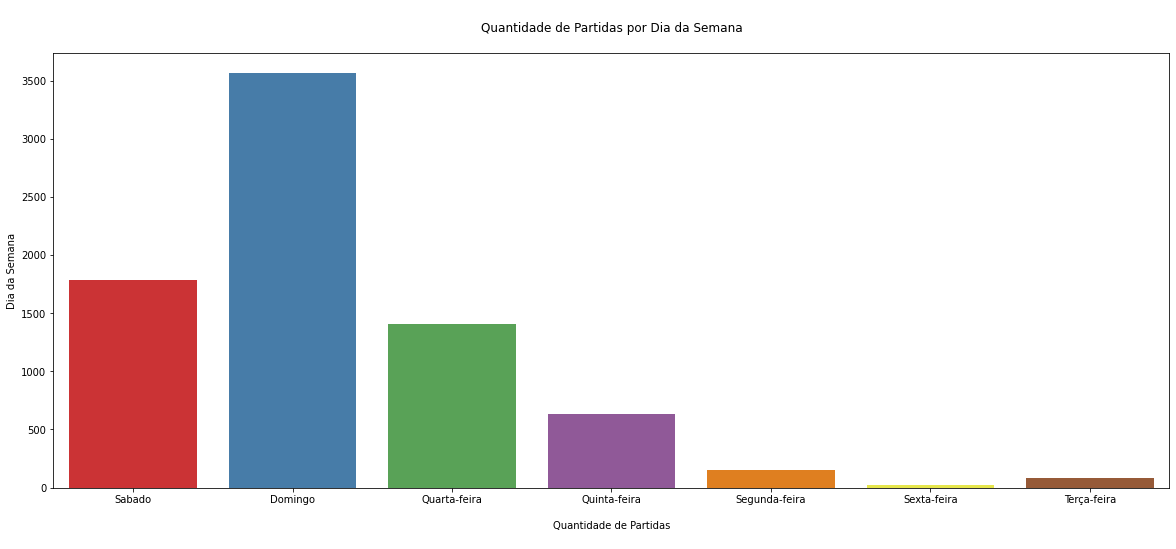

In [17]:
#Quantidade de Jogos por dia da semana
plt.figure(figsize = (20,8))

# Barplot
sns.countplot(x=df['dia'], data=df, palette="Set1")

plt.ylabel('Dia da Semana')             
plt.xlabel('\nQuantidade de Partidas\n')
plt.title('\nQuantidade de Partidas por Dia da Semana\n')
plt.show()

In [18]:
#Media de gols do mandante e do visitante por ano
mediagolsmandantevisitante= df.groupby('ano')['mandante_placar', 'visitante_placar'].mean().reset_index()
mediagolsmandantevisitante

C:\Users\vilia\AppData\Local\Temp/ipykernel_13624/797809458.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mediagolsmandantevisitante= df.groupby('ano')['mandante_placar', 'visitante_placar'].mean().reset_index()


,ano,mandante_placar,visitante_placar
0,2003,1.778986,1.105072
1,2004,1.715580,1.063406
2,2005,1.807359,1.333333
3,2006,1.589474,1.121053
4,2007,1.668421,1.086842
5,2008,1.731579,0.992105
6,2009,1.734211,1.144737
7,2010,1.528947,1.044737
8,2011,1.605263,1.071053
9,2012,1.471053,1.002632


In [19]:
#Agrupando media de gols por mandante
mediagolsmandante = df.groupby('mandante')['mandante_placar'].mean().reset_index()
mediagolsmandante.shape

(45, 2)

In [20]:
#Apos agrupar,separar o top 10 e arredondar para dois decimais
top10mandante = mediagolsmandante.sort_values(by=['mandante_placar'], ascending=False).reset_index().head(10)
top10mandante['mandante_placar'] = np.round(top10mandante['mandante_placar'], decimals = 2)
top10mandante

,index,mandante,mandante_placar
0,34,Paysandu,1.97
1,7,Barueri,1.84
2,39,Santos,1.82
3,4,Atletico-MG,1.77
4,17,Cruzeiro,1.77
5,24,Gremio,1.73
6,32,Palmeiras,1.72
7,23,Goias,1.71
8,41,Sao Paulo,1.68
9,20,Flamengo,1.66


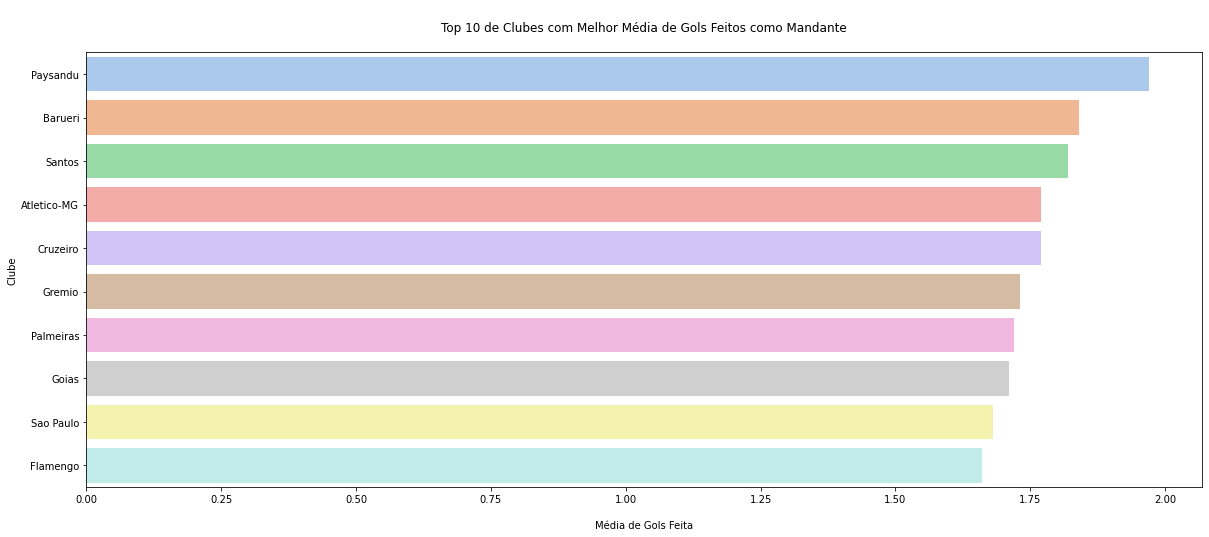

In [21]:
#Grafico para demonstrar top 10 de gols marcados como mandante
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = top10mandante['mandante'], x = top10mandante['mandante_placar'], orient = "h", palette = "pastel")

plt.ylabel('Clube')             
plt.xlabel('\nMédia de Gols Feita')
plt.title('\nTop 10 de Clubes com Melhor Média de Gols Feitos como Mandante\n')
plt.show()

In [22]:
#Times que mais fizeram gols como mandante ente 2003 e 2021
golsmandante = df.groupby('mandante')['mandante_placar'].sum().reset_index()
golsmandante

,mandante,mandante_placar
0,America-MG,90
1,America-RN,12
2,Athletico-PR,580
3,Atletico-GO,136
4,Atletico-MG,624
5,Avai,147
6,Bahia,255
7,Barueri,35
8,Botafogo-RJ,480
9,Bragantino,62


In [23]:
#Separando o top 10 de times com maior numero de gols marcados em casa
top10golsmandante = golsmandante.sort_values(by=['mandante_placar'], ascending=False).reset_index().head(10)
top10golsmandante

,index,mandante,mandante_placar
0,39,Santos,674
1,4,Atletico-MG,624
2,41,Sao Paulo,624
3,20,Flamengo,615
4,24,Gremio,606
5,17,Cruzeiro,590
6,2,Athletico-PR,580
7,32,Palmeiras,567
8,27,Internacional,565
9,21,Fluminense,555


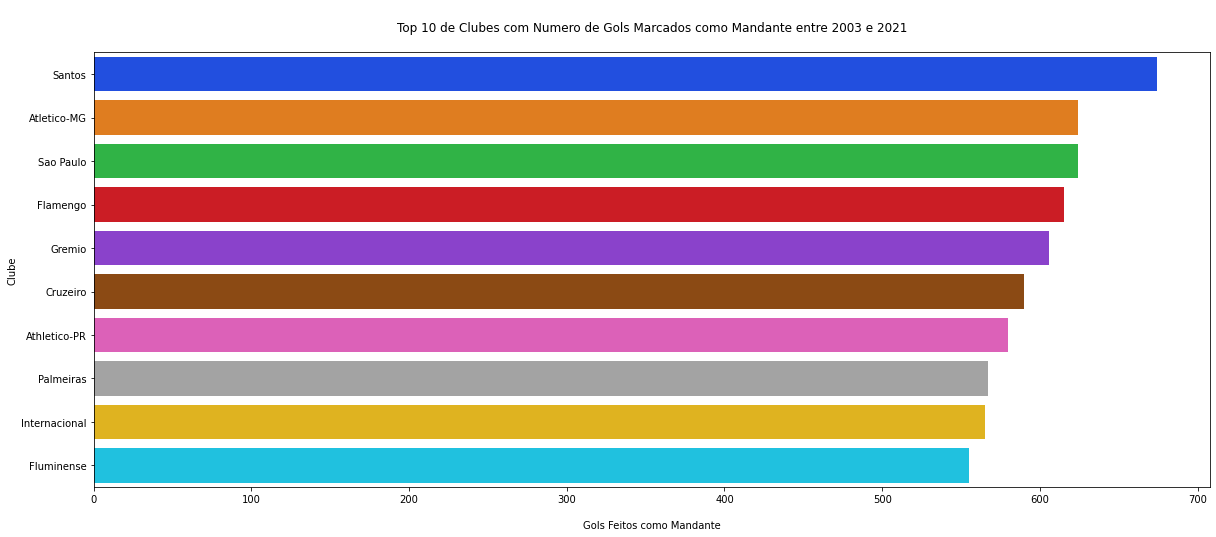

In [24]:
#Grafico para demonstrar top 10 de mandantes com mais gols marcados entre 2003 e 2021
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = top10golsmandante['mandante'], x = top10golsmandante['mandante_placar'], orient = "h", palette = "bright")

plt.ylabel('Clube')             
plt.xlabel('\nGols Feitos como Mandante')
plt.title('\nTop 10 de Clubes com Numero de Gols Marcados como Mandante entre 2003 e 2021\n')
plt.show()

In [25]:
#Agrupando visitantes com mais gols marcados entre 2003 e 2021
golsvisitante = df.groupby('visitante')['visitante_placar'].sum().reset_index()
top10visitante = golsvisitante.sort_values(by=['visitante_placar'], ascending=False).reset_index().head(10)
top10visitante

,index,visitante,visitante_placar
0,41,Sao Paulo,444
1,20,Flamengo,438
2,21,Fluminense,429
3,39,Santos,421
4,4,Atletico-MG,410
5,17,Cruzeiro,388
6,32,Palmeiras,380
7,27,Internacional,372
8,14,Corinthians,372
9,2,Athletico-PR,353


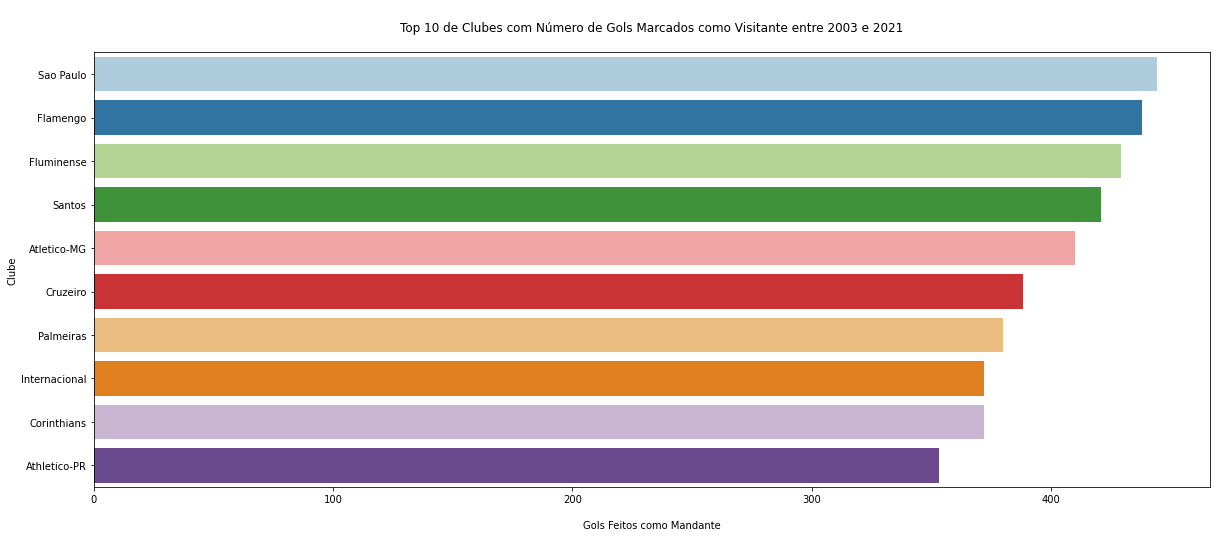

In [26]:
#Grafico para demonstrar top 10 de visitantes com mais gols marcados entre 2003 e 2021
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = top10visitante['visitante'], x = top10visitante['visitante_placar'], orient = "h", palette = "Paired")

plt.ylabel('Clube')             
plt.xlabel('\nGols Feitos como Mandante')
plt.title('\nTop 10 de Clubes com Número de Gols Marcados como Visitante entre 2003 e 2021\n')
plt.show()

In [27]:
#Vamos ver quais estadios mais receberam partidas do campeonato brasileiro
estadios = df['arena'].value_counts().reset_index()
estadios

,index,arena
0,maracana,562
1,mineirao,422
2,morumbi,376
3,couto pereira,258
4,serra dourada,235
...,...,...
147,luiz lacerda,1
148,juscelino kubitscheck,1
149,estadio paulo constantino,1
150,castelao ce,1


In [28]:
top10estadios = estadios.sort_values(by=['arena'], ascending=False).reset_index().head(10)
top10estadios

,level_0,index,arena
0,0,maracana,562
1,1,mineirao,422
2,2,morumbi,376
3,3,couto pereira,258
4,4,serra dourada,235
5,5,orlando scarpelli,219
6,6,pacaembu,213
7,7,beira rio,200
8,8,vila belmiro,192
9,9,barradao,183


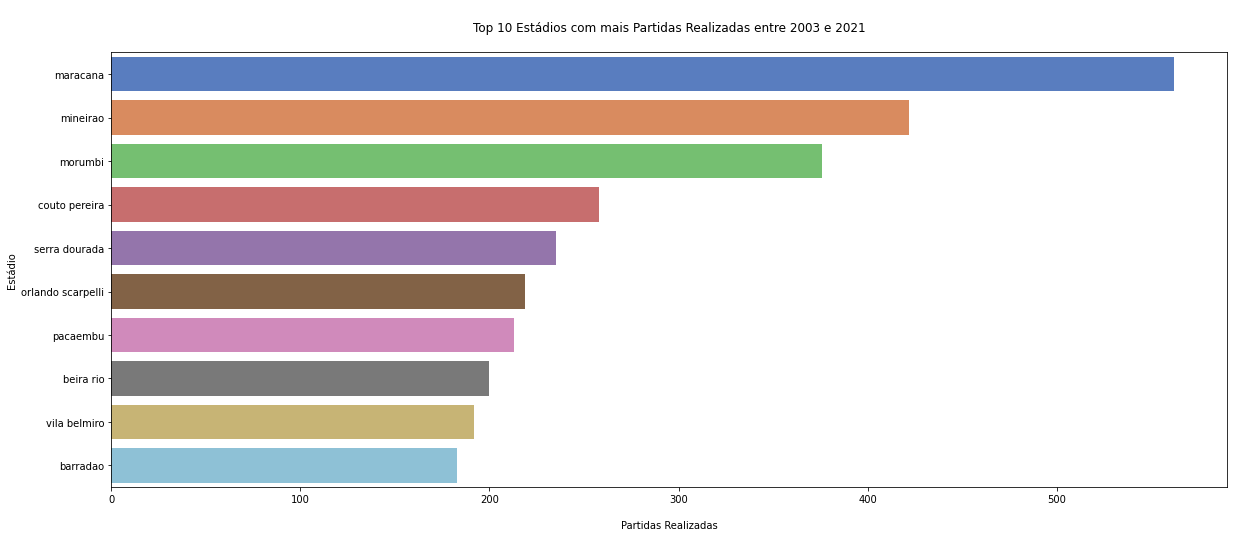

In [29]:
#Grafico para demonstrar top 10 de visitantes com mais gols marcados entre 2003 e 2021
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = top10estadios['index'], x = top10estadios['arena'], orient = "h", palette = "muted")

plt.ylabel('Estádio')             
plt.xlabel('\nPartidas Realizadas')
plt.title('\nTop 10 Estádios com mais Partidas Realizadas entre 2003 e 2021\n')
plt.show()

In [43]:
#Criando as colunas de vencedor mandantes e visitantes para análise
df['vencedor_mandante'] = np.where(df['vencedor'] == df['mandante'], df['vencedor'], '-')
df.head(10)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,total_gols,ano,vencedor_mandante
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,...,Guarani,brinco de ouro,4,2,SP,RJ,SP,6,2003,Guarani
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,...,Athletico-PR,arena da baixada,2,0,PR,RS,PR,2,2003,Athletico-PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,...,-,maracana,1,1,RJ,PR,-,2,2003,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,...,-,serra dourada,2,2,GO,PA,-,4,2003,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,...,-,beira rio,1,1,RS,SP,-,2,2003,-
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,NaN,NaN,NaN,...,Criciuma,heriberto hulse,2,0,SC,RJ,SC,2,2003,Criciuma
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,NaN,NaN,NaN,...,-,alfredo jaconi,2,2,RS,SP,-,4,2003,-
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,NaN,NaN,NaN,...,-,castelao,0,0,CE,BA,-,0,2003,-
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,NaN,NaN,NaN,...,-,mineirao,2,2,MG,SP,-,4,2003,-
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,NaN,NaN,NaN,...,-,barradao,1,1,BA,SC,-,2,2003,-


In [45]:
pd.set_option('display.max_columns', 100)

In [46]:
df['vencedor_visitante'] = np.where(df['vencedor'] == df['visitante'], df['vencedor'], '-')
df.head(10)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,total_gols,ano,vencedor_mandante,vencedor_visitante
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP,6,2003,Guarani,-
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR,2,2003,Athletico-PR,-
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-,2,2003,-,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-,4,2003,-,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-,2,2003,-,-
5,6,1,2003-03-30,16:00,Domingo,Criciuma,Fluminense,NaN,NaN,NaN,NaN,Criciuma,heriberto hulse,2,0,SC,RJ,SC,2,2003,Criciuma,-
6,7,1,2003-03-30,16:00,Domingo,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,alfredo jaconi,2,2,RS,SP,-,4,2003,-,-
7,8,1,2003-03-30,16:00,Domingo,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,castelao,0,0,CE,BA,-,0,2003,-,-
8,9,1,2003-03-30,16:00,Domingo,Cruzeiro,Sao Caetano,NaN,NaN,NaN,NaN,-,mineirao,2,2,MG,SP,-,4,2003,-,-
9,10,1,2003-03-30,16:00,Domingo,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,barradao,1,1,BA,SC,-,2,2003,-,-


In [48]:
melhoresmandantes = df['vencedor_mandante'].value_counts().reset_index().head(11)
melhoresmandantes

,index,vencedor_mandante
0,-,3812
1,Santos,216
2,Sao Paulo,213
3,Internacional,207
4,Gremio,204
5,Flamengo,203
6,Athletico-PR,200
7,Atletico-MG,199
8,Corinthians,193
9,Palmeiras,185


In [49]:
melhoresmandantes.drop([0], axis=0, inplace=True)
melhoresmandantes

,index,vencedor_mandante
1,Santos,216
2,Sao Paulo,213
3,Internacional,207
4,Gremio,204
5,Flamengo,203
6,Athletico-PR,200
7,Atletico-MG,199
8,Corinthians,193
9,Palmeiras,185
10,Cruzeiro,184


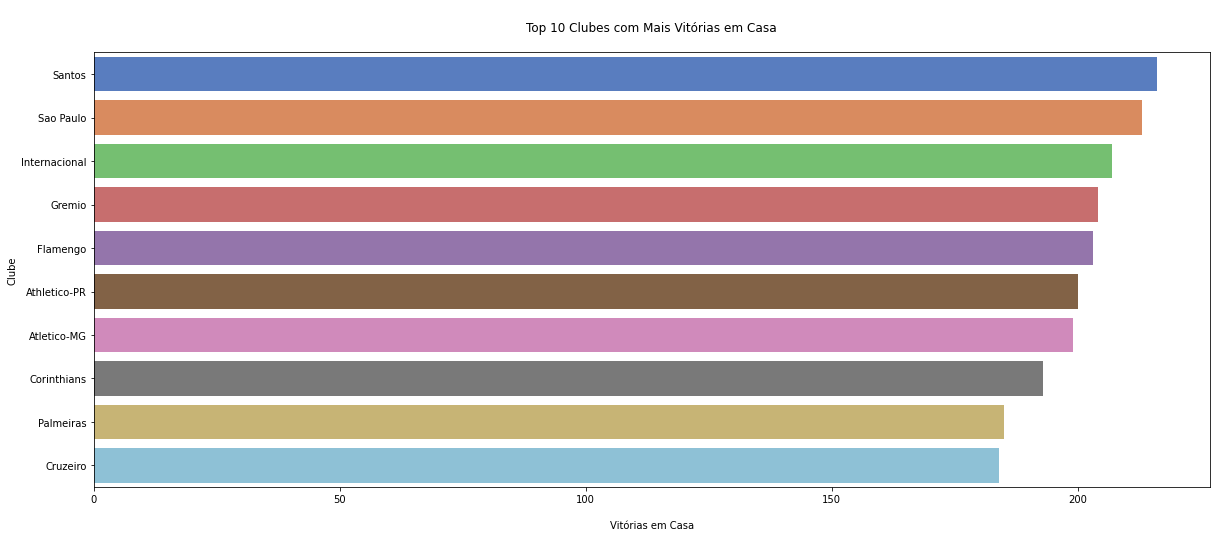

In [50]:
#Grafico para demonstrar top 10 de mandantes com mais vitórias entre 2003 e 2021
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = melhoresmandantes['index'], x = melhoresmandantes['vencedor_mandante'], orient = "h", palette = "muted")

plt.ylabel('Clube')             
plt.xlabel('\nVitórias em Casa')
plt.title('\nTop 10 Clubes com Mais Vitórias em Casa\n')
plt.show()

In [51]:
melhoresvisitantes = df['vencedor_visitante'].value_counts().reset_index().head(11)
melhoresvisitantes

,index,vencedor_visitante
0,-,5848
1,Sao Paulo,125
2,Flamengo,114
3,Cruzeiro,109
4,Fluminense,105
5,Corinthians,103
6,Palmeiras,101
7,Santos,101
8,Internacional,97
9,Atletico-MG,94


In [52]:
melhoresvisitantes.drop([0], axis=0, inplace=True)
melhoresvisitantes

,index,vencedor_visitante
1,Sao Paulo,125
2,Flamengo,114
3,Cruzeiro,109
4,Fluminense,105
5,Corinthians,103
6,Palmeiras,101
7,Santos,101
8,Internacional,97
9,Atletico-MG,94
10,Gremio,91


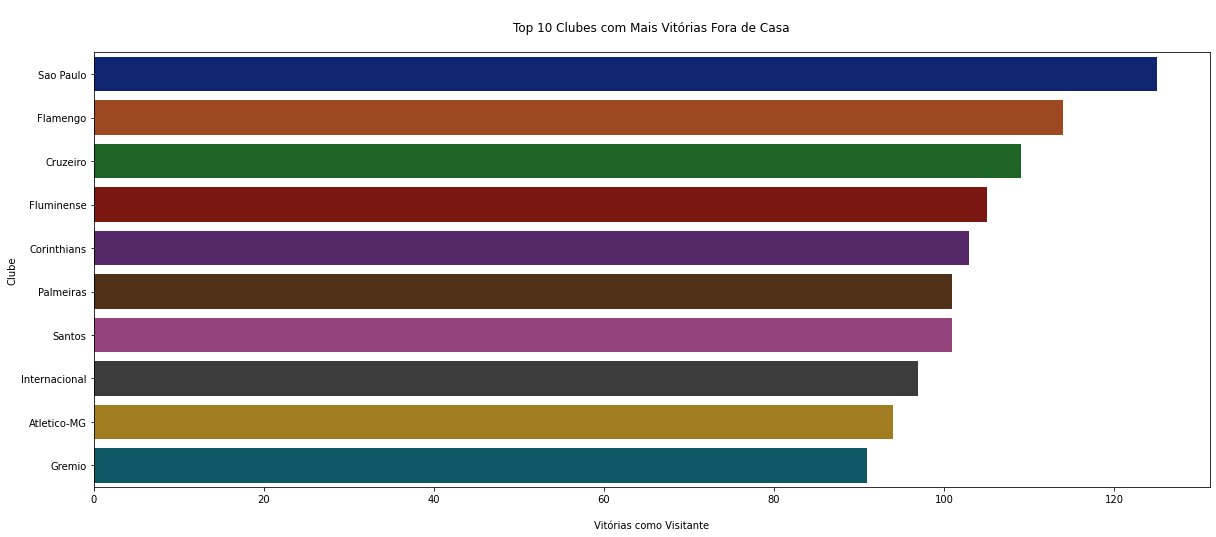

In [55]:
#Grafico para demonstrar top 10 de visitantes com mais vitórias entre 2003 e 2021
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = melhoresvisitantes['index'], x = melhoresvisitantes['vencedor_visitante'], orient = "h", palette = "dark")

plt.ylabel('Clube')             
plt.xlabel('\nVitórias como Visitante')
plt.title('\nTop 10 Clubes com Mais Vitórias Fora de Casa\n')
plt.show()

In [59]:
df['mes'] = df['data'].dt.month
df.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,total_gols,ano,vencedor_mandante,vencedor_visitante,mes
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP,6,2003,Guarani,-,3
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR,2,2003,Athletico-PR,-,3
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-,2,2003,-,-,3
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-,4,2003,-,-,3
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-,2,2003,-,-,3


#Media gols por mes. Como verificando, sem grandes variações
mediagolmes = df.groupby('mes')['total_gols'].mean().reset_index()
mediagolmes